In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math

In [10]:
def define_mask():
    mask = [[1,1,1],[1,1,1],[1,1,1]]
    for i in range(3):
        for j in range(3):
            print(mask[i][j], end=" ")
        print()    
    return mask

In [11]:
def my_dilation(img, mask):
    m=img.shape[0]
    n=img.shape[1]
    img_2 = np.zeros((m,n))
    for i in range(1,m-1):
        for j in range(1,n-1):
            x1= img[i-1,j-1] and mask[0][0]
            x2= img[i-1,j] and mask[0][1]
            x3= img[i-1,j+1] and mask[0][2]
            x4= img[i,j-1] and mask[1][0]
            x5= img[i,j] and mask[1][1]
            x6= img[i,j+1] and mask[1][2]
            x7= img[i+1,j-1] and mask[2][0]
            x8= img[i+1,j] and mask[2][1]
            x9= img[i+1,j+1] and mask[2][2]

            result = x1 or x2 or x3 or x4 or x5 or x6 or x7 or x8 or x9
            img_2[i,j]=result
    return img_2


In [12]:
mask = define_mask()

1 1 1 
1 1 1 
1 1 1 


In [13]:
def get_distance(v,w=[1/3,1/3,1/3]):
    a,b,c= v[0],v[1],v[2]
    w1,w2,w3=w[0],w[1],w[2]
    d=((a**2)*w[0] + (b**2)*w[1] +(c**2)*w[2])**.5
    return d

In [14]:
def convert_rgb_to_gray_level(img):
    m=img.shape[0]
    n=img.shape[1]
    img_2=np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            img_2[i,j]=get_distance(img[i,j,:])
    return img_2

In [15]:
def convert_gray_level_to_BW(img):
    m=img.shape[0]
    n=img.shape[1]
    img_bw=np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            if img[i,j] > 120:
                img_bw[i,j]=1
            else:
                img_bw[i,j]=0
    return img_bw

1 1 1 
1 1 1 
1 1 1 
1 1 1 
1 1 1 
1 1 1 


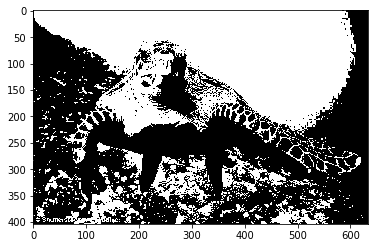

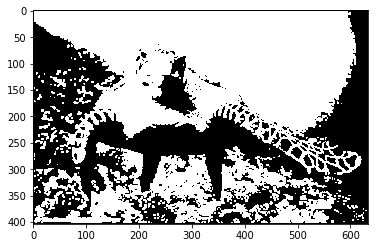

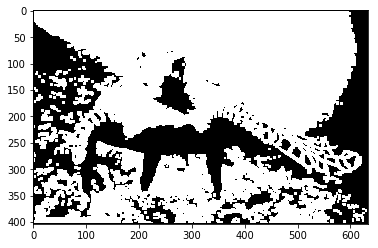

(<matplotlib.image.AxesImage at 0x22375365550>, None)

In [16]:
img =mpimg.imread("turtle.jpg")
%matplotlib inline

img_2=convert_rgb_to_gray_level(img)
img_3=convert_gray_level_to_BW(img_2)

img_4 = my_dilation(img_3, define_mask())
img_5 = my_dilation(img_4, define_mask())

plt.imshow(img_3, cmap="gray"), plt.show()
plt.imshow(img_4, cmap="gray"), plt.show()
plt.imshow(img_5, cmap="gray"), plt.show()